# 2.2節

## 実践４

リスト 2.1

In [1]:
import matplotlib.pyplot as plt, numpy as np, math

np.random.seed(1)
n = 4
d = 5
x_data = 6*np.random.rand(n) - 3
lam_data = 1 - 1.5*x_data + np.sin(x_data) + np.cos(3*x_data)

x = np.linspace(-3, 3, 100)
lam = 1 - 1.5*x + np.sin(x) + np.cos(3*x)

リスト 2.2

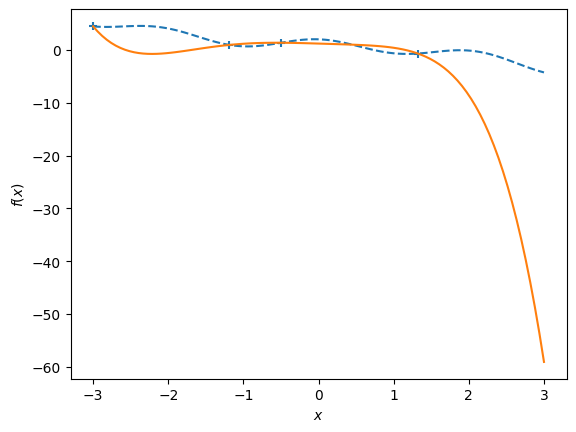

(Text(0.5, 24.0, '$x$'), Text(26.000000000000007, 0.5, '$f(x)$'), None)

In [2]:
def Phi(x, d):
    Phi = 1
    for m in range(d):
        Phi = np.hstack((Phi, x**(m + 1)))
    return Phi

def Phi_matrix(x1, x2, d):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = Phi(x1[i], d).T @ Phi(x2[j], d)
    return K

K = Phi_matrix(x_data, x_data, d)
c = np.linalg.pinv(K) @ lam_data
lam_sol = Phi_matrix(x, x_data.T, d)  @ c

fig, ax = plt.subplots()
ax.plot(x, lam, ls="--"), ax.plot(x, lam_sol)
ax.scatter(x_data, lam_data, marker='+')
plt.xlabel('$x$'), plt.ylabel('$f(x)$'), plt.show()

# 2.3節

## 実践５

In [3]:
import matplotlib.pyplot as plt, numpy as np, math

np.random.seed(1)
n = 4
x_data = 6*np.random.rand(n) - 3
lam_data = 1 - 1.5*x_data + np.sin(x_data) + np.cos(3*x_data)

x = np.linspace(-3, 3, 100)
lam = 1 - 1.5*x + np.sin(x) + np.cos(3*x)

リスト 2.3

In [4]:
def kernel_func(x1, x2): 
    gamma = 1/2
    k = math.exp(-gamma*np.sum((x1 - x2)**2))
    return k

def kernel_matrix(x1, x2):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j])
    return K

リスト 2.4

In [5]:
K = kernel_matrix(x_data, x_data)
c = np.linalg.inv(K) @ lam_data

リスト 2.5

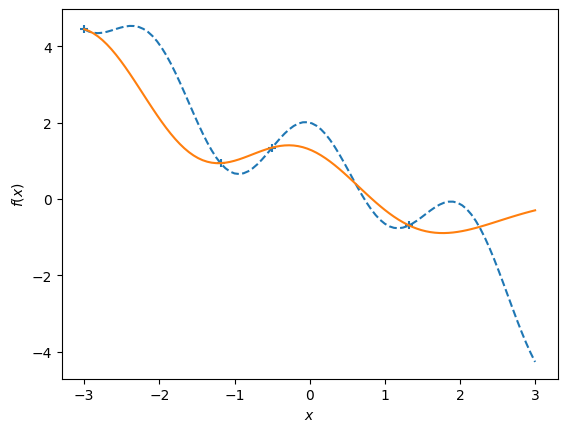

In [6]:
k_s = kernel_matrix(x, x_data) 
lam_sol = k_s @ c
x = np.linspace(-3, 3, 100)
lam = 1 - 1.5*x + np.sin(x) + np.cos(3*x)

fig, ax = plt.subplots()
ax.plot(x, lam, ls="--"), ax.plot(x, lam_sol)
ax.scatter(x_data, lam_data, marker='+')
plt.xlabel('$x$'), plt.ylabel('$f(x)$'), plt.show()

L = np.linalg.norm(K @ c - lam_data)**2 

リスト 2.6

In [7]:
# import matplotlib.pyplot as plt, numpy as np, math

# np.random.seed(1)
# n = 4
# d = 2 
# x_data = 6*np.random.rand(n) - 3
# lam_data = 1 - 1.5*x_data + np.sin(x_data) + np.cos(3*x_data) + np.random.normal(0, 0.1, n)

# x = np.linspace(-3, 3, 100)
# lam = 1 - 1.5*x + np.sin(x) + np.cos(3*x)

# 2.4節

## 実践６

In [8]:
import matplotlib.pyplot as plt, numpy as np, math

np.random.seed(1)
n = 4
d = 5
x_data = 6*np.random.rand(n) - 3
lam_data = 1 - 1.5*x_data + np.sin(x_data) + np.cos(3*x_data)

x = np.linspace(-3, 3, 100)
lam = 1 - 1.5*x + np.sin(x) + np.cos(3*x)

In [9]:
def kernel_func(x1, x2): 
    gamma = 1/2
    k = math.exp(-gamma*np.sum((x1-x2)**2))
    return k

def kernel_matrix(x1, x2):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j])
    return K

リスト 2.7

In [10]:
K = kernel_matrix(x_data, x_data)
alpha = 5e-7
c = np.linalg.inv(K.T @ K + alpha*np.identity(n)) @ K.T @ lam_data

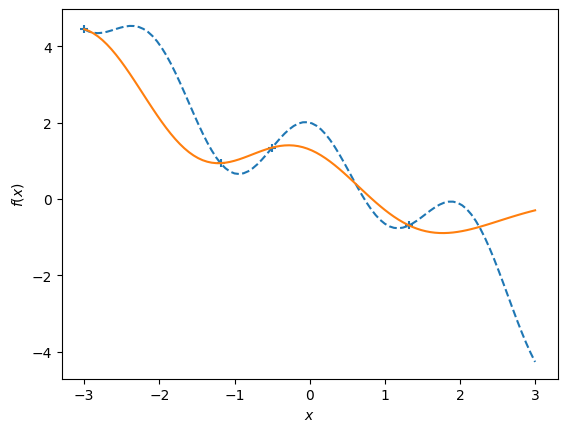

In [11]:
k_s = kernel_matrix(x, x_data) 
lam_sol = k_s @ c
x = np.linspace(-3, 3, 100)
lam = 1 - 1.5*x + np.sin(x) + np.cos(3*x)

fig, ax = plt.subplots()
ax.plot(x, lam, ls="--"), ax.plot(x, lam_sol)
ax.scatter(x_data, lam_data, marker='+')
plt.xlabel('$x$'), plt.ylabel('$f(x)$'), plt.show()

L = np.linalg.norm(K @ c - lam_data)**2 